# 06_C-energyplus_analysis



In [1]:
import sys,os
fp=os.path.join(os.pardir)
if not fp in sys.path: sys.path.append(fp)
import openbuilding as ob
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

openbuilding.__init__


### reads all .pickle results files and places them in a dictionary

In [2]:
bims=[]
dn=r'../05_D-energyplus_results/'
for i in range(0,360,5):
    print(i,end=' ')
    fn='detached_house_{}.pickle'.format(i)
    fp=os.path.join(dn,fn)
    bim=ob.BimGraph()
    bim.read_pickle(fp)
    bims.append(bim)
    #break

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355 

### plots living room air temperature for all variants

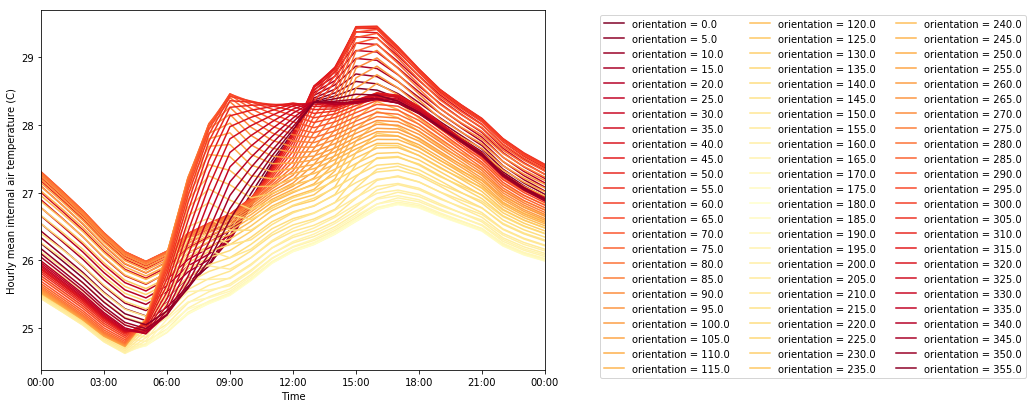

Figure 1: Living room hourly mean internal air temperature for varying building orientations for July 7th


In [4]:
fig=plt.figure(figsize=(14,5))
ax=fig.add_axes([0, 0, 0.5, 1])
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_ylabel('Hourly mean internal air temperature (C)')
for bim in bims:
    building=bim.filter_node_by_label('Building')
    orientation=building.orientation
    j=abs((orientation-180)/180.0)
    space_living_room=[space for space in building.successor_nodes(label='Space') if space.id=='LIVING_ROOM'][0]
    s=space_living_room.air_temperature.ts.series
    mask=((s.index >= pd.Timestamp('2001-07-07')) & (s.index <= pd.Timestamp('2001-07-08')))
    s=s[mask]
    ax.plot(s.index,s.data,'-',
            color=plt.cm.YlOrRd(j),
            label='orientation = ' + str(orientation))
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1),ncol=3)
ax.set_xlim(min(s.index),max(s.index))
plt.show()
fig.savefig('Figure_1.png',bbox_inches='tight', pad_inches=0.25)
print('Figure 1: Living room hourly mean internal air temperature for varying building orientations for July 7th')

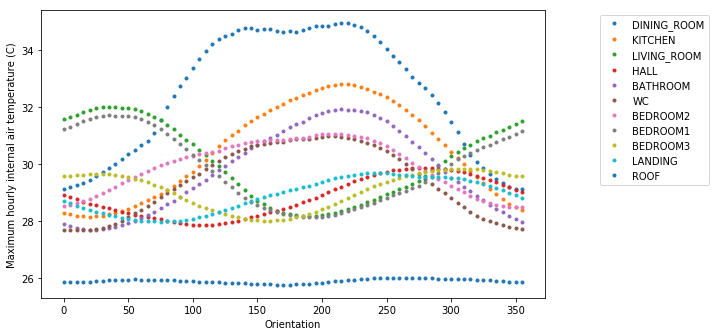

Figure 2: Building orientation vs. maximum hourly internal air temperature for each room


In [5]:
fig=plt.figure(figsize=(14,4))
ax=fig.add_axes([0, 0, 0.5, 1])
ax.set_xlabel('Orientation')
ax.set_ylabel('Maximum hourly internal air temperature (C)')
x=[]
y={}
for i,bim in enumerate(bims):
    building=bim.filter_node_by_label('Building')
    orientation=building.orientation
    x.append(orientation)
    for space in building.successor_nodes(label='Space'):
        max_temp=space.air_temperature.ts.series.max()
        if not space.id in y:
            y[space.id]=[max_temp]
        else:
            y[space.id].append(max_temp)
for id in y:
    ax.plot(x,y[id],'.',label=id)
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1),ncol=1)
fig.savefig('Figure_2.png',bbox_inches='tight', pad_inches=0.25)
plt.show()
print('Figure 2: Building orientation vs. maximum hourly internal air temperature for each room')